In [12]:
import numpy as np
import pandas as pd

In [13]:
df=pd.read_csv("/content/the shit.csv")

In [14]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r"[^\w\s]", "", regex=True)
      .str.replace(r"\s+", "_", regex=True)
)

df.columns

Index(['sl_no', 'stateut',
       'no_of_electric_vehicle_ev_charging_stations_installed', 'unnamed_3',
       'unnamed_4', 'unnamed_5', 'unnamed_6',
       'total_no_of_ev_charging_stations_installed_by_omcs_from_their_own_funds_as_on_01012025'],
      dtype='object')

In [15]:
df.drop(columns=["unnamed_4","unnamed_3","unnamed_5","unnamed_6"],inplace=True)

In [16]:
df.rename(columns={'no_of_electric_vehicle_ev_charging_stations_installed': 'Ev_Chargers_march_2025'}, inplace=True)
df.rename(columns={'total_no_of_ev_charging_stations_installed_by_omcs_from_their_own_funds_as_on_01012025': 'Ev_Chargers_jan_2025'}, inplace=True)


In [17]:
df2=pd.read_csv("/content/RS_Session_267_AU_3924_A.csv")

In [18]:
df2.fillna(0)
df2=df2.drop(df2.index[[36]])

In [19]:
corr = df2['Total'].corr(df['Ev_Chargers_march_2025'])

In [20]:
print(corr)

0.37429869339260086


##correlation
we can see that ther is a strong positive relation between these ev chargers and ev sales as of march 2025


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

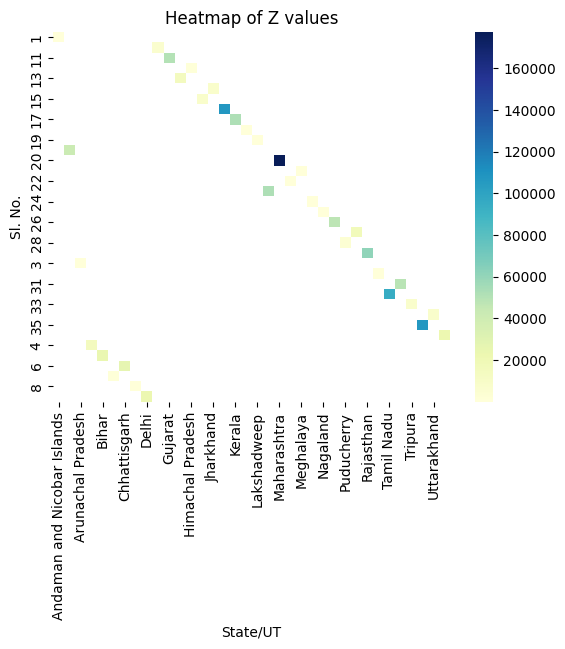

In [22]:
# Pivot the data to create a 2D grid
df2_pivot = df2.pivot(index='Sl. No.', columns='State/UT', values='Total')

# Create the heatmap
ax = sns.heatmap(df2_pivot, cmap="YlGnBu")
ax.set_title("Heatmap of Z values")
plt.show()